<a href="https://colab.research.google.com/github/usman1301/ByteME_Project/blob/master/Kaggle_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
data_folder = ('/content/drive/My Drive/data_chal/')

In [0]:
import pandas as pd
df2 = pd.read_csv(data_folder + 'airbnbTrain.csv')
df1 = pd.read_csv(data_folder + 'airbnbTest.csv')

In [0]:
df_Seattle = df2[df2['{randomControl}'].astype(str).str.startswith("124")] 

In [0]:
df_Seattle.set_index('id',inplace=True)

In [0]:
df_Seattle.head()

,high_booking_rate,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,extra_people,guests_included,host_about,host_acceptance_rate,host_has_profile_pic,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_neighbourhood,host_response_rate,host_response_time,host_since,host_verifications,house_rules,instant_bookable,interaction,is_business_travel_ready,is_location_exact,latitude,longitude,market,maximum_nights,minimum_nights,monthly_price,neighborhood_overview,neighbourhood,notes,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,security_deposit,space,square_feet,state,transit,weekly_price,zipcode,{randomControl}
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1057692,1,Our guest have access to the full apartment as...,3,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",16,16,16,16,1.0,Real Bed,0.0,1.0,moderate,Seattle,$39.00,Open studio layout with a full bathroom. The k...,$0.00,2,I'm Linda! \r\n\r\nWe are part time Seattlites...,NaN,True,False,False,6.0,"Seattle, Washington, United States",First Hill,100%,within an hour,2014-09-06,"['email', 'phone', 'reviews', 'jumio', 'offlin...",- * *Please take a look at our house manual an...,True,We love to show off Seattle when in the area a...,False,False,47.61193,-122.32215,Seattle,30,2,NaN,"Capitol Hill is vibrant, lively with endless c...",First Hill,NaN,$70.00,Apartment,False,False,True,8.0,9.0,9.0,8.0,10.0,88.0,8.0,Entire home/apt,$0.00,NaN,NaN,WA,*Everything is walkable! *Pronto Bike rental a...,NaN,98101,124109
1011515,1,This unit is a Mother-In-Law Suite in the base...,4,"{TV,Internet,Wifi,Kitchen,""Free street parking...",0,0,0,0,1.0,Real Bed,1.0,1.0,moderate,Seattle,$50.00,Downstairs 1 BR apt (up to 4 people) with prvt...,$10.00,2,We are a young multi-national hipster outdoors...,NaN,True,True,False,2.0,"Seattle, Washington, United States",Wallingford,100%,within an hour,2012-08-15,"['email', 'phone', 'facebook', 'reviews', 'jum...","No smoking, no pets please (we are allergic). ...",False,Since the apartment is underneath the main hou...,False,True,47.65060,-122.33404,Seattle,100,3,"$2,500.00",Wallingford is a lovely residential yet hip ne...,Wallingford,Keyless entry = easy checkin. We are open to e...,$99.00,House,False,False,True,10.0,10.0,10.0,10.0,10.0,93.0,9.0,Entire home/apt,NaN,Enjoy your own private Mother-in-Law unit with...,NaN,WA,The new metrolink to UW makes it easy to take ...,NaN,98103,124910
1071063,0,NaN,2,"{""Air conditioning"",""Free street parking"",Heat...",30,90,60,90,1.0,Real Bed,1.0,1.0,moderate,Seattle,$0.00,Unwind and enjoy the city in our Cozy and Clea...,$0.00,1,NaN,NaN,True,False,False,376.0,"Seattle, Washington, United States",Cory - Merrill,99%,within an hour,2018-12-04,"['email', 'phone', 'reviews']",NaN,False,Send us an in app message if you have any ques...,False,True,47.58499,-122.30055,Seattle,7,1,NaN,15 mins to downtown Seattle 15 mins to Bellev...,Atlantic,NaN,$82.00,Guest suite,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,$0.00,NaN,NaN,WA,Great transit access. Free on-street parking....,NaN,98144,124323
1013640,0,"This is the home of artists, musicians, and yo...",1,"{Wifi,Kitchen,Essentials,Shampoo,""Laptop frien...",0,0,0,0,1.0,Real Bed,1.0,1.0,moderate,Seattle,NaN,"This is the home of artists, musicians, and yo...",$0.00,1,Hi there! I am an artist and educator. I curr...,NaN,True,True,False,2.0,"Seattle, Washington, United States",North Beacon Hill,NaN,NaN,2014-04-16,"['email', 'phone', 'reviews', 'kba']",NaN,False,There are 3 amazing women that live here. Ever...,False,True,47.58308,-122.31540,Seattle,1125,1,NaN,North Bea

In [0]:
df_Seattle.to_csv('Seattle_airbnb.csv')
!cp Seattle_airbnb.csv "drive/My Drive/"

In [0]:
df_Seattle.shape

(5414, 66)

In [0]:
df2['train']=1
df1['train'] =0

In [0]:
raw_df = pd.concat([df2,df1],sort=False)

In [0]:
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100000)

The dataset contains 202116 Airbnb listings


In [0]:
raw_df.shape()

TypeError: ignored

In [0]:
raw_df.isna().sum().sort_values()

id                                       0
instant_bookable                         0
{randomControl}                          0
is_business_travel_ready                 0
is_location_exact                        0
latitude                                 0
longitude                                0
host_verifications                       0
maximum_nights                           0
price                                    0
property_type                            0
require_guest_phone_verification         0
require_guest_profile_picture            0
requires_license                         0
room_type                                0
minimum_nights                           0
guests_included                          0
train                                    0
availability_30                          0
availability_60                          0
bed_type                                 0
cancellation_policy                      0
extra_people                             0
availabilit

In [0]:
raw_df['host_since'].sample(5)

29141    2012-10-14
25482    2017-03-24
4687     2018-05-14
44449    2017-05-22
51747    2014-08-22
Name: host_since, dtype: object

In [0]:
cols_to_drop = ['amenities','access','description','host_about','host_verifications','house_rules','interaction','is_business_travel_ready','neighborhood_overview','notes','space','transit']
df = raw_df.drop(cols_to_drop, axis=1)

In [0]:
df.isna().sum().sort_values()

id                                       0
room_type                                0
requires_license                         0
require_guest_profile_picture            0
require_guest_phone_verification         0
property_type                            0
price                                    0
minimum_nights                           0
maximum_nights                           0
longitude                                0
latitude                                 0
{randomControl}                          0
instant_bookable                         0
guests_included                          0
is_location_exact                        0
train                                    0
extra_people                             0
availability_365                         0
bed_type                                 0
cancellation_policy                      0
availability_90                          0
availability_30                          0
accommodates                             0
availabilit

In [0]:
cols_to_drop2 = ['host_acceptance_rate','square_feet','monthly_price','weekly_price']
df = df.drop(cols_to_drop2, axis=1)

In [0]:
# space
#df['space'].fillna(0, inplace=True)
#df["space"]=df["space"].apply(lambda x: 1 if x!=0 else 0)

In [0]:
df['description'].fillna(0, inplace=True)
df["description"]=df["description"].apply(lambda x: 1 if x!=0 else 0)

In [0]:
df.head(1)

,id,high_booking_rate,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,extra_people,guests_included,host_about,host_acceptance_rate,host_has_profile_pic,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_neighbourhood,host_response_rate,host_response_time,host_since,host_verifications,house_rules,instant_bookable,is_business_travel_ready,is_location_exact,latitude,longitude,market,maximum_nights,minimum_nights,monthly_price,neighborhood_overview,neighbourhood,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,security_deposit,space,square_feet,state,transit,weekly_price,zipcode,train
0,1060760,0.0,0,4,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",19,67,29,29,2.0,Real Bed,2.0,3.0,strict_14_with_grace_period,Hallandale Beach,$140.00,1,$0.00,1,0,NaN,True,False,False,9.0,"Miami, Florida, United States",NaN,95%,within an hour,2019-03-14,"['email', 'phone', 'offline_government_id', 'g...",NaN,True,False,True,25.98676,-80.12252,Miami,30,1,NaN,NaN,NaN,$199.00,Serviced apartment,False,False,False,10.0,9.0,9.0,10.0,10.0,90.0,10.0,Entire home/apt,NaN,1,NaN,FL,NaN,NaN,33009,1


In [0]:
print(f"The dataset contains {len(df)} Airbnb listings")
pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_rows', 100000)

The dataset contains 202116 Airbnb listings


In [0]:
df.isna().sum().sort_values()

id                                      0
room_type                               0
requires_license                        0
require_guest_profile_picture           0
require_guest_phone_verification        0
property_type                           0
price                                   0
minimum_nights                          0
maximum_nights                          0
longitude                               0
latitude                                0
is_location_exact                       0
{randomControl}                         0
guests_included                         0
instant_bookable                        0
train                                   0
availability_60                         0
availability_90                         0
extra_people                            0
bed_type                                0
cancellation_policy                     0
availability_365                        0
accommodates                            0
availability_30                   

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: ignored

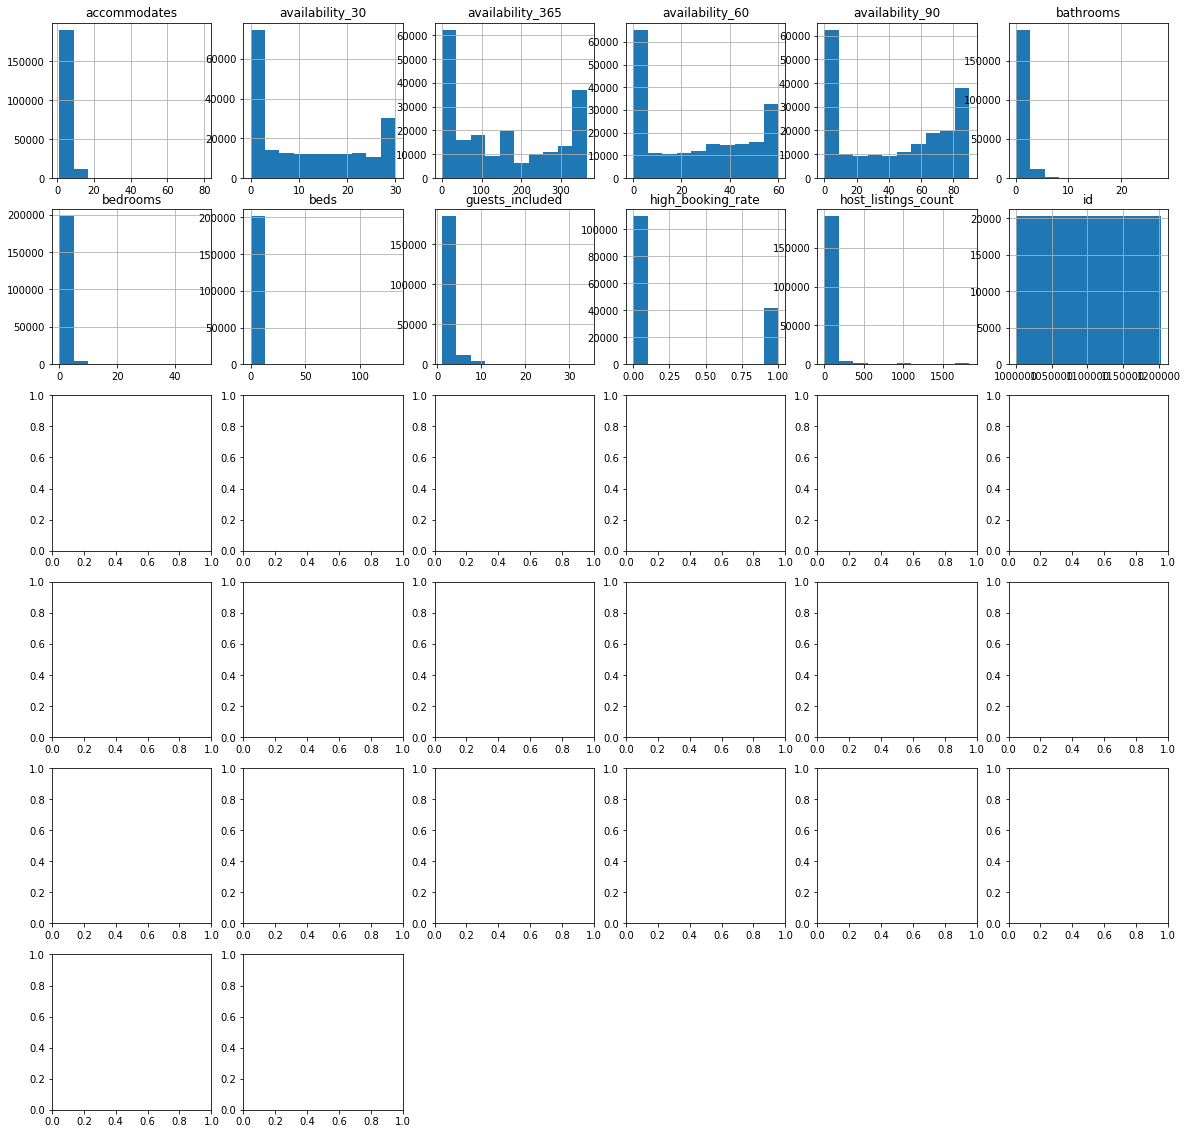

In [0]:
# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

In [0]:
import datetime
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since)

# Calculating the number of days
df['host_days_active'] = (datetime.datetime.now() - df.host_since).astype('timedelta64[D]')

In [0]:
print(df["host_days_active"].value_counts())

1625.0    1204
1215.0     897
2419.0     778
2626.0     550
1168.0     525
2251.0     483
554.0      482
1842.0     425
1587.0     340
1184.0     303
2293.0     300
937.0      297
497.0      286
552.0      272
2258.0     268
1266.0     266
2920.0     260
2095.0     259
523.0      254
1834.0     252
1141.0     249
1306.0     242
2155.0     239
1419.0     237
294.0      236
1119.0     235
1242.0     228
1446.0     227
1948.0     227
1504.0     227
1054.0     226
1611.0     224
1679.0     221
1442.0     208
1091.0     207
1373.0     207
2374.0     202
1817.0     201
559.0      199
1503.0     199
1730.0     199
2098.0     197
1693.0     196
1593.0     196
1295.0     194
673.0      189
1121.0     189
1798.0     188
1217.0     187
963.0      186
1348.0     181
1274.0     181
1027.0     180
901.0      179
1106.0     178
1022.0     176
1636.0     174
1568.0     171
2091.0     170
2006.0     168
2094.0     167
2009.0     165
1287.0     163
1910.0     160
1323.0     159
1174.0     158
1362.0    

In [0]:
df.drop(['host_since'], axis=1, inplace=True)

In [0]:
print(df["host_response_rate"].value_counts())


100%    118610
99%       6576
90%       5140
98%       3524
97%       2767
80%       2230
96%       2138
0%        1493
94%       1414
95%       1394
50%       1231
92%       1227
88%       1124
93%       1072
89%       1071
86%        954
91%        904
83%        850
67%        820
70%        729
75%        661
60%        654
87%        568
82%        385
40%        353
78%        331
84%        314
85%        299
33%        258
81%        212
71%        209
79%        151
76%        139
25%        125
30%        114
74%        106
62%        104
20%         95
72%         93
77%         93
57%         92
73%         90
63%         79
69%         79
64%         78
38%         75
68%         71
56%         53
43%         48
66%         46
10%         40
14%         36
58%         36
29%         33
65%         30
55%         22
17%         20
44%         20
46%         18
59%         16
54%         13
49%         13
47%         12
61%         11
22%         10
53%          9
27%       

In [0]:
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 96.0
Median host response rate: 100.0
Proportion of 100% host response rates: 73.4%


In [0]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       118610
unknown     40472
90-99%      21016
50-89%      17966
0-49%        4052
Name: host_response_rate, dtype: int64

In [0]:
df.property_type.value_counts()

Apartment                 80314
House                     57047
Condominium               24067
Townhouse                  8611
Guest suite                7621
Guesthouse                 4770
Loft                       3251
Bungalow                   2609
Serviced apartment         2521
Villa                      1935
Boutique hotel             1464
Cottage                    1350
Resort                     1004
Hotel                       954
Bed and breakfast           905
Other                       629
Hostel                      537
Camper/RV                   512
Aparthotel                  426
Cabin                       367
Tiny house                  364
Farm stay                   180
Boat                        124
Tent                         80
Earth house                  47
Treehouse                    43
Dome house                   42
Castle                       40
Yurt                         39
Chalet                       37
Campsite                     33
Houseboa

In [0]:
df.property_type.replace({
    'Townhouse': 'House',
    'Condominium' : 'Apartment',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House',
    'Guest suite' : 'House',
    'Guesthouse' : 'House',
    'Boutique hotel' : 'Hotel',
    'Resort' : 'Hotel',
    'Bed and breakfast' : 'Hotel',
    'Hostel' : 'Hotel'  
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

In [0]:
df.isna().sum().sort_values()

id                                      0
{randomControl}                         0
room_type                               0
requires_license                        0
require_guest_profile_picture           0
require_guest_phone_verification        0
property_type                           0
price                                   0
minimum_nights                          0
maximum_nights                          0
longitude                               0
latitude                                0
train                                   0
instant_bookable                        0
guests_included                         0
is_location_exact                       0
availability_90                         0
accommodates                            0
availability_30                         0
availability_365                        0
availability_60                         0
extra_people                            0
bed_type                                0
cancellation_policy               

In [0]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [0]:
df.bed_type.value_counts()

Real Bed         200263
Futon               722
Pull-out Sofa       542
Airbed              394
Couch               195
Name: bed_type, dtype: int64

In [0]:
df.drop('bed_type', axis=1, inplace=True)

In [0]:
df['host_verifications']

0        ['email', 'phone', 'offline_government_id', 'g...
1                            ['email', 'phone', 'reviews']
2        ['email', 'phone', 'reviews', 'jumio', 'govern...
3                                       ['email', 'phone']
4        ['email', 'phone', 'offline_government_id', 'g...
                               ...                        
50522    ['email', 'phone', 'google', 'reviews', 'jumio...
50523    ['email', 'phone', 'reviews', 'jumio', 'kba', ...
50524                ['email', 'phone', 'facebook', 'kba']
50525    ['phone', 'jumio', 'offline_government_id', 's...
50526       ['email', 'phone', 'google', 'reviews', 'kba']
Name: host_verifications, Length: 202116, dtype: object

In [0]:
# Creating a set of all possible amenities
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air hockey table',
 'Air purifier',
 'Alarm system',
 'Alfresco bathtub',
 'Alfresco shower',
 'Amazon Echo',
 'Apple TV',
 'Art studio',
 'Arts and Crafts',
 'BBQ grill',
 'Baby bath',
 'Baby equipment',
 'Baby monitor',
 'Babysitter recommendations',
 'Baking sheet',
 'Balcony',
 'Bar',
 'Basketball court',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach',
 'Beach bar',
 'Beach chairs',
 'Beach club',
 'Beach essentials',
 'Beach towels',
 'Beach umbrella',
 'Beach view',
 'Beach volleyball',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bicycle',
 'Bidet',
 'Bike storage',
 'Blender',
 'Blu-Ray player',
 'Board games',
 'Boat',
 'Bocce ball court',
 'Body soap',
 'Boogie boards',
 'Booster seat',
 'Breakfast',
 'Breakfast bar',
 'Breakfast table',
 'Brick oven',
 'Building staff',
 'Business center',
 'Buzzer/wireless intercom',
 'CD p

In [0]:

host_verifications_list = list(df.host_verifications)

host_verifications_set = [x.strip() for x in host_verifications_list_string.split(',')]
host_verifications_set = set(host_verifications_set)
host_verifications_set

{"'amex'",
 "'facebook'",
 "'facebook'] None ['email'",
 "'facebook'] ['email'",
 "'facebook'] ['phone'",
 "'facebook'] ['phone'] ['email'",
 "'facebook'] ['reviews'",
 "'facebook'] [] ['email'",
 "'google'",
 "'google'] None ['email'",
 "'google'] None ['phone'",
 "'google'] ['email'",
 "'google'] ['offline_government_id'",
 "'google'] ['phone'",
 "'google'] ['phone'] ['email'",
 "'google'] ['reviews'",
 "'government_id'",
 "'government_id'] None None ['email'",
 "'government_id'] None ['email'",
 "'government_id'] None ['phone'",
 "'government_id'] None ['phone'] ['email'",
 "'government_id'] None ['phone'] ['phone'",
 "'government_id'] ['email'",
 "'government_id'] ['email'] ['email'",
 "'government_id'] ['email'] ['phone'",
 "'government_id'] ['jumio'",
 "'government_id'] ['offline_government_id'",
 "'government_id'] ['phone'",
 "'government_id'] ['phone'] None ['email'",
 "'government_id'] ['phone'] ['email'",
 "'government_id'] ['phone'] ['offline_government_id'",
 "'government_i

In [0]:
# comeback df.drop('amenities', axis=1, inplace=True)

In [0]:
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

In [0]:
df.security_deposit.isna().sum()

49809

In [0]:
raw_df['security_deposit'].head(20)

0           NaN
1           NaN
2       $200.00
3           NaN
4           NaN
5       $200.00
6           NaN
7       $100.00
8       $500.00
9       $300.00
10        $0.00
11      $100.00
12          NaN
13      $100.00
14      $400.00
15        $0.00
16        $0.00
17        $0.00
18    $1,000.00
19      $200.00
Name: security_deposit, dtype: object

In [0]:
df.security_deposit = df.security_deposit.str[1:-3]
df.security_deposit = df.security_deposit.str.replace(",", "")
df.security_deposit.fillna(0, inplace=True)
df.security_deposit = df.security_deposit.astype('int64')

In [0]:
df.cleaning_fee = df.cleaning_fee.str[1:-3]
df.cleaning_fee = df.cleaning_fee.str.replace(",", "")
df.cleaning_fee.fillna(0, inplace=True)
df.cleaning_fee = df.cleaning_fee.astype('int64')

In [0]:
df.extra_people = df.extra_people.str[1:-3]
df.extra_people = df.extra_people.str.replace(",", "")
df.extra_people.fillna(0, inplace=True)
df.extra_people = df.extra_people.astype('int64')

In [0]:
df.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

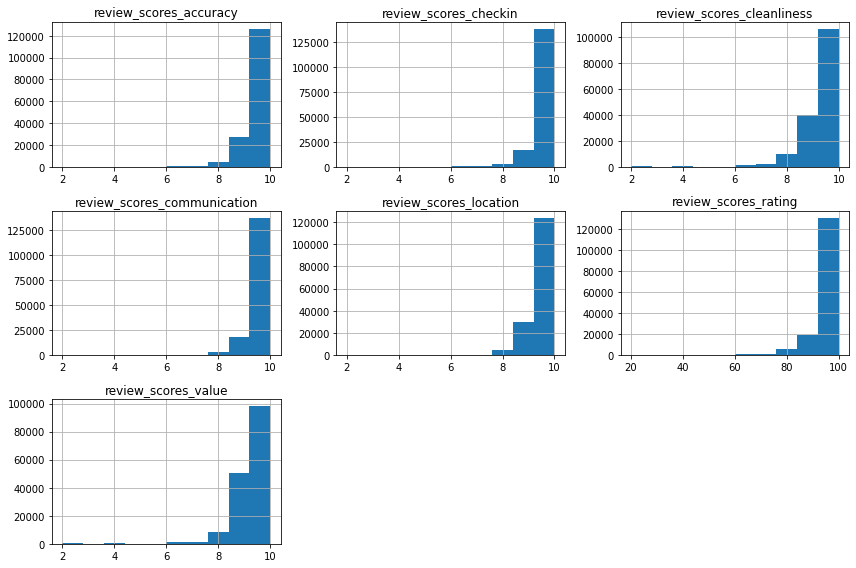

In [0]:
import matplotlib.pyplot as plt
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [0]:
variables_to_plot.pop(5)

'review_scores_rating'

In [0]:
def bin_column(col, bins, labels, na_label='unknown'):
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [0]:
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

In [0]:
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

In [0]:
df.cancellation_policy.value_counts()

strict_14_with_grace_period    89575
moderate                       54093
flexible                       50419
super_strict_60                 4392
super_strict_30                 2371
strict                          1043
luxury_moderate                  161
luxury_super_strict_95            47
luxury_super_strict_125            8
luxury_no_refund                   7
Name: cancellation_policy, dtype: int64

In [0]:
df.cancellation_policy.replace({
    'super_strict_30': 'strict_14_with_grace_period',
    'super_strict_60': 'strict_14_with_grace_period',
    'strict': 'strict_14_with_grace_period',
    'luxury_moderate': 'moderate',
    'luxury_super_strict_95': 'moderate',
    'luxury_super_strict_125': 'moderate',
    'luxury_no_refund': 'moderate'
    }, inplace=True)

In [0]:
df.cancellation_policy.value_counts()

strict_14_with_grace_period    97381
moderate                       54316
flexible                       50419
Name: cancellation_policy, dtype: int64

In [0]:
df.isna().sum().sort_values()

id                                      0
{randomControl}                         0
security_deposit                        0
room_type                               0
requires_license                        0
require_guest_profile_picture           0
require_guest_phone_verification        0
property_type                           0
price                                   0
minimum_nights                          0
maximum_nights                          0
longitude                               0
latitude                                0
train                                   0
instant_bookable                        0
is_location_exact                       0
bathrooms                               0
accommodates                            0
availability_30                         0
availability_365                        0
availability_60                         0
availability_90                         0
guests_included                         0
extra_people                      

In [0]:
df.space.value_counts()

1    156507
0     45609
Name: space, dtype: int64

In [0]:
import numpy as np
s = df['neighbourhood'].value_counts()
df['neighbourhood'] = np.where(df['neighbourhood'].isin(s.index[s < 300]), 'Other', df['neighbourhood'])

In [0]:
df['review_scores_accuracy']

0        10/10
1        10/10
2          nan
3          nan
4        10/10
         ...  
50522    10/10
50523    10/10
50524      nan
50525      nan
50526     9/10
Name: review_scores_accuracy, Length: 202116, dtype: object

In [0]:
q = df['host_location'].value_counts()
df['host_location'] = np.where(df['host_location'].isin(q.index[q < 100]), 'Other', df['host_location'])

In [0]:
r = df['market'].value_counts()
df['market'] = np.where(df['market'].isin(r.index[r < 100]), 'Other', df['market'])

In [0]:

z = df['city'].value_counts()
df['city'] = np.where(df['city'].isin(z.index[z < 100]), 'Other', df['city'])

In [0]:
u = df['state'].value_counts()
df['state'] = np.where(df['state'].isin(u.index[u < 90]), 'Other', df['state'])

In [0]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

within an hour        0.591918
unknown               0.200241
within a few hours    0.130668
within a day          0.063132
a few days or more    0.014041
Name: host_response_time, dtype: float64

In [0]:
df.isna().sum().sort_values()

id                                      0
is_location_exact                       0
latitude                                0
longitude                               0
maximum_nights                          0
minimum_nights                          0
price                                   0
property_type                           0
require_guest_phone_verification        0
require_guest_profile_picture           0
requires_license                        0
review_scores_accuracy                  0
review_scores_checkin                   0
review_scores_cleanliness               0
review_scores_communication             0
review_scores_location                  0
review_scores_rating                    0
review_scores_value                     0
room_type                               0
security_deposit                        0
train                                   0
instant_bookable                        0
is_business_travel_ready                0
description                       

In [0]:
df.host_location.value_counts()

New York, New York, United States                  28140
US                                                 23786
Other                                              23481
Los Angeles, California, United States             17367
San Diego, California, United States                8414
San Francisco, California, United States            7972
Austin, Texas, United States                        6918
Seattle, Washington, United States                  6425
Washington, District of Columbia, United States     5632
Chicago, Illinois, United States                    5542
Nashville, Tennessee, United States                 4177
Las Vegas, Nevada, United States                    4100
New Orleans, Louisiana, United States               3580
Brooklyn, New York, United States                   3263
Portland, Oregon, United States                     3209
Denver, Colorado, United States                     3076
Honolulu, Hawaii, United States                     2894
Minneapolis, Minnesota, United 

In [0]:
cols_to_drop1 = ['neighborhood_overview','house_rules','host_neighbourhood','neighbourhood','host_location']
df = df.drop(cols_to_drop1, axis=1)

In [0]:
df.isna().sum().sort_values()

id                                      0
{randomControl}                         0
security_deposit                        0
room_type                               0
requires_license                        0
require_guest_profile_picture           0
require_guest_phone_verification        0
property_type                           0
price                                   0
minimum_nights                          0
maximum_nights                          0
longitude                               0
latitude                                0
train                                   0
instant_bookable                        0
is_location_exact                       0
bathrooms                               0
accommodates                            0
availability_30                         0
availability_365                        0
availability_60                         0
availability_90                         0
guests_included                         0
extra_people                      

In [0]:
e = df['market'].value_counts()
df['market'] = np.where(df['market'].isin(e.index[e == 1546]), 'Other', df['market'])

In [0]:
df.city.value_counts()

Los Angeles              18283
New York                 17910
Brooklyn                 16203
Other                    10806
San Diego                10170
Austin                    8877
Las Vegas                 7525
Washington                7237
Seattle                   7207
Chicago                   6793
San Francisco             6777
Nashville                 5827
New Orleans               5201
Queens                    3882
Denver                    3844
Portland                  3829
Honolulu                  3708
Minneapolis               2948
Boston                    2718
Oakland                   2594
San Jose                  2543
Lahaina                   2441
Jersey City               2439
Kihei                     2311
Hollywood                 2290
Fort Lauderdale           1993
Asheville                 1715
Long Beach                1430
Kailua-Kona               1169
Columbus                  1076
Cambridge                 1001
Santa Monica               958
Princevi

In [0]:
cols_to_drop2 = ['zipcode','state','city','bedrooms','beds']
df = df.drop(cols_to_drop2, axis=1)

In [0]:
df.isna().sum().sort_values()

id                                      0
{randomControl}                         0
security_deposit                        0
room_type                               0
requires_license                        0
require_guest_phone_verification        0
property_type                           0
price                                   0
minimum_nights                          0
maximum_nights                          0
longitude                               0
latitude                                0
is_location_exact                       0
train                                   0
instant_bookable                        0
accommodates                            0
availability_30                         0
availability_365                        0
availability_60                         0
availability_90                         0
extra_people                            0
cleaning_fee                            0
cancellation_policy                     0
beds                              

In [0]:
cols_to_drop5 = ['longitude','latitude']
df = df.drop(cols_to_drop5, axis=1)

In [0]:
cols_to_drop5 = ['state','city']
df = df.drop(cols_to_drop5, axis=1)

In [0]:
cols_to_drop3 = ['{randomControl}']
df = df.drop(cols_to_drop3, axis=1)

In [0]:
# Replacing columns with f/t with 0/1
df.replace({'False': 0, 'True': 1}, inplace=True)

In [0]:
df['host_is_superhost'].fillna(0, inplace=True)
df['host_identity_verified'].fillna(0, inplace=True)
df['host_has_profile_pic'].fillna(0, inplace=True)

In [0]:
for col in ['host_days_active', 'host_listings_count']:
    df[col].fillna(df[col].median(), inplace=True)

In [0]:
df.isna().sum().sort_values()

id                                      0
{randomControl}                         0
security_deposit                        0
room_type                               0
requires_license                        0
require_guest_phone_verification        0
property_type                           0
price                                   0
minimum_nights                          0
maximum_nights                          0
longitude                               0
latitude                                0
is_location_exact                       0
train                                   0
instant_bookable                        0
accommodates                            0
availability_30                         0
availability_365                        0
availability_60                         0
availability_90                         0
extra_people                            0
cleaning_fee                            0
cancellation_policy                     0
beds                              

In [0]:
df.is_location_exact .value_counts()

True     160844
False     41272
Name: is_location_exact, dtype: int64

In [0]:
cols_to_drop3 = ['is_business_travel_ready','host_verifications','longitude','latitude']
df = df.drop(cols_to_drop3, axis=1)

In [0]:
df.isna().sum().sort_values()

id                                      0
instant_bookable                        0
maximum_nights                          0
train                                   0
minimum_nights                          0
price                                   0
property_type                           0
require_guest_phone_verification        0
requires_license                        0
room_type                               0
extra_people                            0
cleaning_fee                            0
cancellation_policy                     0
beds                                    0
bedrooms                                0
bathrooms                               0
availability_90                         0
availability_60                         0
availability_365                        0
availability_30                         0
accommodates                            0
security_deposit                        0
is_location_exact                       0
market                            

In [0]:
df.zipcode.value_counts()

96815                                                                                                  2930
96753                                                                                                  2753
96761                                                                                                  2680
92109                                                                                                  2210
11211                                                                                                  1795
78704                                                                                                  1741
92101                                                                                                  1710
96740                                                                                                  1661
11221                                                                                                  1580
89109                       

In [0]:
cols_to_drop8 = ['host_has_profile_pic','host_location','host_neighbourhood','neighbourhood','zipcode']
df = df.drop(cols_to_drop8, axis=1)

In [0]:
df.host_identity_verified = df.host_identity_verified.astype(bool)

In [0]:
df.host_is_superhost = df.host_is_superhost.astype(bool)

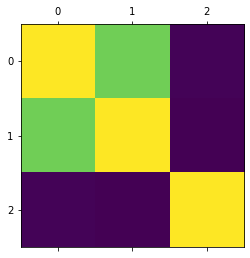

In [0]:
col_of = ['require_guest_phone_verification','require_guest_profile_picture','requires_license']
plt.matshow(df[col_of].corr())
plt.show()

In [0]:
cols_to_drop4 = ['require_guest_profile_picture','guests_included','review_scores_checkin','review_scores_value','review_scores_communication']
df = df.drop(cols_to_drop4, axis=1)

In [0]:
#

In [0]:
#cols_to_drop6 = ['review_scores_value','review_scores_checkin','review_scores_accuracy']
df = df.drop(cols_to_drop6, axis=1)

In [0]:
opo = ['accommodates','availability_90','cleaning_fee','extra_people','host_listings_count','latitude','longitude','maximum_nights','minimum_nights','price','security_deposit','host_days_active']

In [0]:
dfopo = df[['train','high_booking_rate','accommodates','availability_90','cleaning_fee','extra_people','host_listings_count','latitude','longitude','maximum_nights','minimum_nights','price','security_deposit','host_days_active']]

In [0]:
dfopo

,accommodates,availability_90,cleaning_fee,extra_people,host_listings_count,latitude,longitude,maximum_nights,minimum_nights,price,security_deposit,host_days_active
0,4,29,140,0,9.0,25.98676,-80.12252,30,1,199,0,361.0
1,4,0,30,0,1.0,40.76198,-73.98718,14,2,350,0,2092.0
2,4,0,125,0,3.0,34.00697,-118.45050,29,2,125,200,2262.0
3,2,84,0,0,0.0,45.18900,-93.13541,1125,2,35,0,780.0
4,2,64,0,0,1.0,33.76120,-118.13839,30,1,150,0,442.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50522,6,86,0,25,1.0,38.92024,-76.98713,1125,1,100,0,1311.0
50523,4,70,0,55,25.0,37.79883,-122.40474,7,1,38,0,1963.0
50524,2,90,200,0,1.0,37.75674,-122.49178,60,60,100,0,3402.0
50525,2,0,50,75,1.0,34.17269,-118.39887,39,3,150,100,3273.0


In [0]:
df.isna().sum().sort_values()

id                                      0
security_deposit                        0
room_type                               0
review_scores_rating                    0
review_scores_location                  0
review_scores_cleanliness               0
review_scores_accuracy                  0
requires_license                        0
require_guest_phone_verification        0
property_type                           0
price                                   0
minimum_nights                          0
maximum_nights                          0
is_location_exact                       0
train                                   0
instant_bookable                        0
host_response_rate                      0
accommodates                            0
amenities                               0
availability_90                         0
bathrooms                               0
cancellation_policy                     0
host_response_time                      0
cleaning_fee                      

In [0]:
df.dtypes

id                                    int64
high_booking_rate                   float64
accommodates                          int64
availability_30                       int64
availability_365                      int64
availability_60                       int64
availability_90                       int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
cancellation_policy                  object
cleaning_fee                          int64
extra_people                          int64
host_has_profile_pic                 object
host_identity_verified               object
host_is_superhost                    object
host_listings_count                 float64
host_location                        object
host_neighbourhood                   object
host_response_rate                  float64
host_response_time                   object
instant_bookable                       bool
is_location_exact               

In [0]:
cols_to_drop6 = ['description']
df = df.drop(cols_to_drop6, axis=1)

KeyError: ignored

In [0]:
df.dtypes

id                                    int64
high_booking_rate                   float64
accommodates                          int64
availability_30                       int64
availability_365                      int64
availability_60                       int64
availability_90                       int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
cancellation_policy                  object
cleaning_fee                          int64
extra_people                          int64
host_identity_verified                 bool
host_is_superhost                      bool
host_listings_count                 float64
host_response_rate                  float64
host_response_time                   object
instant_bookable                       bool
is_location_exact                      bool
market                               object
maximum_nights                        int64
minimum_nights                  

In [0]:
cat_var = ['cancellation_policy','host_response_time','market','property_type','room_type']

In [0]:
transformed_df = pd.get_dummies(df,columns=cat_var,drop_first=True)

In [0]:
print(transformed_df.dtypes)

id                                                                int64
high_booking_rate                                               float64
accommodates                                                      int64
availability_30                                                   int64
availability_365                                                  int64
availability_60                                                   int64
availability_90                                                   int64
bathrooms                                                       float64
bedrooms                                                        float64
beds                                                            float64
cleaning_fee                                                      int64
extra_people                                                      int64
host_identity_verified                                             bool
host_is_superhost                                               

In [0]:
transformed_df.replace({'False': 0, 'True': 1}, inplace=True)

In [0]:
transformed_df.head(5)

,id,high_booking_rate,accommodates,availability_90,bathrooms,cleaning_fee,description,extra_people,host_has_profile_pic,host_identity_verified,host_is_superhost,host_listings_count,instant_bookable,is_location_exact,maximum_nights,minimum_nights,price,require_guest_phone_verification,requires_license,security_deposit,train,host_days_active,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,host_response_rate_100%,host_response_rate_50-89%,host_response_rate_90-99%,host_response_rate_unknown,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,market_Austin,...,market_New Orleans,market_New York,market_Newport,market_North Carolina Mountains,market_Oahu,market_Other,market_Portland,market_Providence,market_San Diego,market_San Francisco,market_Seattle,market_South Bay CA,"market_South Bay, CA",market_South County,market_South Florida Atlantic Coast,market_The Big Island,property_type_House,property_type_Other,review_scores_accuracy_10/10,review_scores_accuracy_9/10,review_scores_accuracy_nan,review_scores_cleanliness_10/10,review_scores_cleanliness_9/10,review_scores_cleanliness_nan,review_scores_location_10/10,review_scores_location_9/10,review_scores_location_nan,review_scores_rating_80-94/100,review_scores_rating_95-100/100,review_scores_rating_nan,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1060760,0.0,4,29,2.0,140,1,0,1,0,0,9.0,1,1,30,1,199,0,0,0,1,362.0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
1,1040685,0.0,4,0,1.0,30,1,0,1,0,0,1.0,0,1,14,2,350,0,0,0,1,2093.0,0,1,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
2,1001074,0.0,4,0,1.0,125,1,0,1,1,1,3.0,1,1,29,2,125,0,1,200,1,2263.0,1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3,1197330,0.0,2,84,2.5,0,1,0,1,0,0,0.0,1,1,1125,2,35,0,0,0,1,781.0,1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
4,1031737,0.0,2,64,1.0,0,1,0,1,0,0,1.0,0,1,30,1,150,0,0,0,1,443.0,0,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0


In [0]:
transformed_df.instant_bookable = transformed_df.instant_bookable.astype(int)

In [0]:
transformed_df.requires_license = transformed_df.requires_license.astype(int)

In [0]:
transformed_df.host_has_profile_pic = transformed_df.host_has_profile_pic.astype(int)
transformed_df.host_identity_verified = transformed_df.host_identity_verified.astype(int)
transformed_df.host_is_superhost = transformed_df.host_is_superhost.astype(int)
transformed_df.is_location_exact = transformed_df.is_location_exact.astype(int)
transformed_df.require_guest_phone_verification = transformed_df.require_guest_phone_verification.astype(int)






In [0]:
transformed_df.isna().sum().sort_values()

id                                                                  0
market_Santiago                                                     0
market_Seattle                                                      0
market_South Bay CA                                                 0
market_South Bay, CA                                                0
market_South County                                                 0
market_South Florida Atlantic Coast                                 0
market_South Florida Gulf Coast                                     0
market_Texas - Austin                                               0
market_San Francisco                                                0
market_The Big Island                                               0
market_Toms River                                                   0
market_Urban Orange County                                          0
market_Willamette Valley                                            0
property_type_Apartm

In [0]:

def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

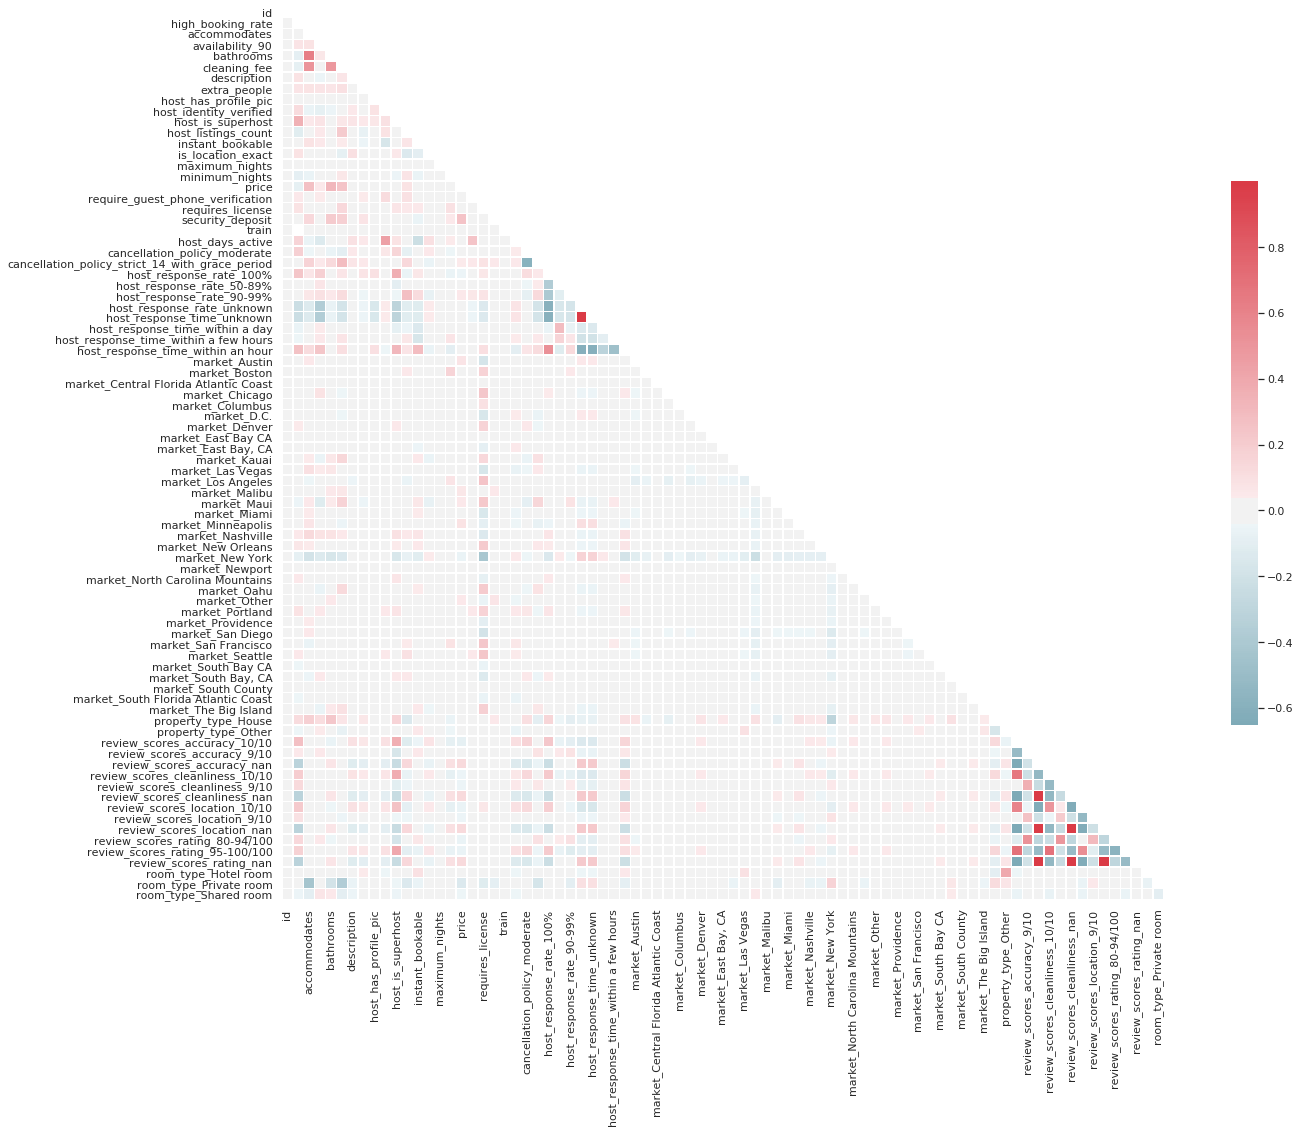

In [0]:
import seaborn as sns
multi_collinearity_heatmap(transformed_df, figsize=(20,20))

In [0]:
to_drop = ['host_response_rate_unknown']
to_drop.extend(list(transformed_df.columns[transformed_df.columns.str.endswith('nan')]))

transformed_df.drop(to_drop, axis=1, inplace=True)

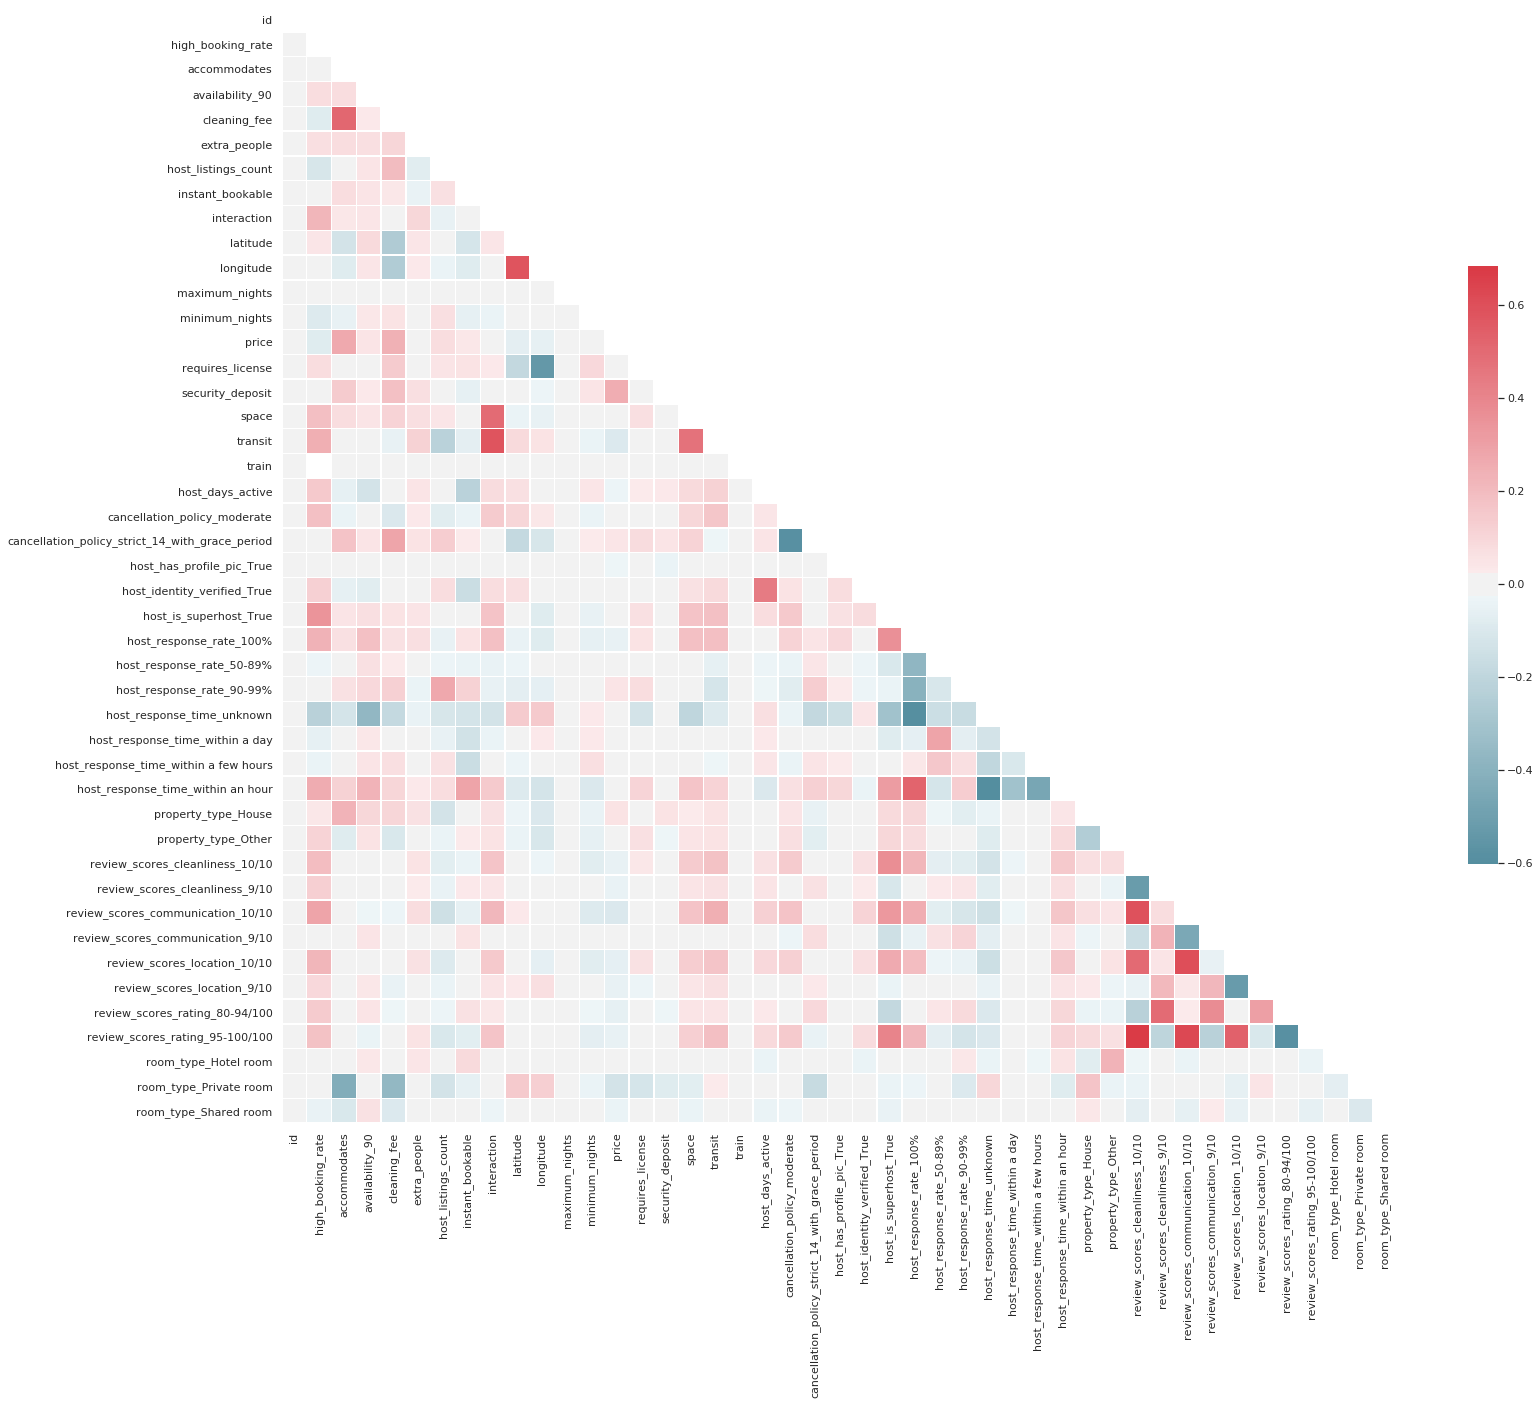

In [0]:

# Final assessment of multi-collinearity
multi_collinearity_heatmap(transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('borough')]), axis=1), figsize=(25,22))

In [0]:
numerical_columns = ['accommodates','availability_90','cleaning_fee','extra_people','host_listings_count','maximum_nights','minimum_nights','price','security_deposit','host_days_active']

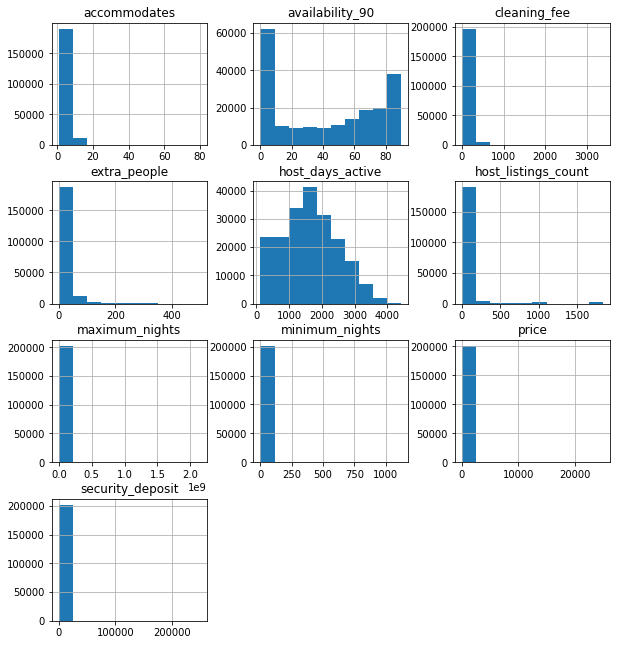

In [0]:
transformed_df[numerical_columns].hist(figsize=(10,11));

In [0]:
import numpy as np
# Log transforming columns
numerical_columns1 = [i for i in numerical_columns if i not in ['availability_90', 'host_days_active']] # Removing items not to be transformed
#numerical_columns1
for col in numerical_columns1:
    transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_df[col] = np.log(transformed_df[col])

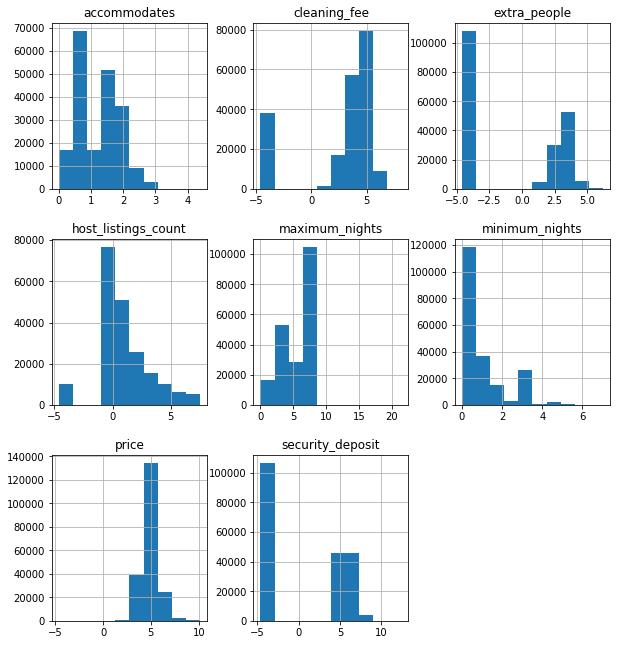

In [0]:
transformed_df[numerical_columns1].hist(figsize=(10,11));

In [0]:
train_df = transformed_df[transformed_df['train']==1]

In [0]:
test_df = transformed_df[transformed_df['train']==0]

In [0]:
train_df.drop(['train'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
test_df.drop(['train'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
train_df.set_index('id',inplace=True)

In [0]:
train_df.head(5)

,high_booking_rate,accommodates,availability_90,cleaning_fee,extra_people,guests_included,host_listings_count,instant_bookable,interaction,latitude,longitude,maximum_nights,minimum_nights,price,requires_license,security_deposit,space,transit,host_days_active,bathrooms_0.5,bathrooms_1.0,bathrooms_1.5,bathrooms_10.0,bathrooms_11.0,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,...,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_House,property_type_Other,review_scores_accuracy_10/10,review_scores_accuracy_9/10,review_scores_accuracy_nan,review_scores_checkin_10/10,review_scores_checkin_9/10,review_scores_checkin_nan,review_scores_cleanliness_10/10,review_scores_cleanliness_9/10,review_scores_cleanliness_nan,review_scores_communication_10/10,review_scores_communication_9/10,review_scores_communication_nan,review_scores_location_10/10,review_scores_location_9/10,review_scores_location_nan,review_scores_rating_80-94/100,review_scores_rating_95-100/100,review_scores_rating_nan,review_scores_value_10/10,review_scores_value_9/10,review_scores_value_nan,room_type_Hotel room,room_type_Private room,room_type_Shared room
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1060760,0.0,1.386294,29,4.941642,-4.60517,0.000000,2.197225,1,1,25.98676,-80.12252,3.401197,0.000000,5.293305,0,-4.605170,1,0,361.0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1040685,0.0,1.386294,0,3.401197,-4.60517,1.386294,0.000000,0,0,40.76198,-73.98718,2.639057,0.693147,5.857933,0,-4.605170,1,1,2092.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1001074,0.0,1.386294,0,4.828314,-4.60517,1.098612,1.098612,1,1,34.00697,-118.45050,3.367296,0.693147,4.828314,1,5.298317,0,0,2262.0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
1197330,0.0,0.693147,84,-4.605170,-4.60517,0.000000,-4.605170,1,1,45.18900,-93.13541,7.025538,0.693147,3.555348,0,-4.605170,0,1,780.0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
1031737,0.0,0.693147,64,-4.605170,-4.60517,0.000000,0.000000,0,1,33.76120,-118.13839,3.401197,0.000000,5.010635,0,-4.605170,1,1,442.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [0]:
train_df.to_csv('train_clean_vNew1.csv')
!cp train_clean_vNew1.csv "drive/My Drive/"

In [0]:
test_df.set_index('id',inplace=True)

In [0]:
test_df.drop(['high_booking_rate'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
test_df.to_csv('test_clean_vNew1.csv')
!cp test_clean_vNew1.csv "drive/My Drive/"

In [0]:
import pandas as pd
train_df = pd.read_csv(data_folder + 'airbnbTrain.csv')
test_df = pd.read_csv(data_folder + 'airbnbTest.csv')

In [0]:
train_df = train_df.select_dtypes(exclude=['object'])

In [0]:
test_df = test_df.select_dtypes(exclude=['object'])

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


X = train_df.drop(['high_booking_rate','id','{randomControl}'],axis=1)
y = train_df['high_booking_rate']
# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

X_test = test_df.drop(['id','{randomControl}'],axis=1)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=list(X_test.columns))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:706: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:706: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [0]:
X

,accommodates,availability_30,availability_365,availability_60,availability_90,bathrooms,bedrooms,beds,guests_included,host_acceptance_rate,host_listings_count,instant_bookable,is_business_travel_ready,is_location_exact,latitude,longitude,maximum_nights,minimum_nights,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,square_feet
0,0.019069,0.709980,-0.637874,0.143806,-0.376451,0.700084,0.434509,0.494768,-0.530150,NaN,-0.189597,1.001472,0.0,0.506395,-1.457807,0.888992,-0.004747,-0.331983,-0.162117,-0.141874,-0.802823,0.399069,-1.179798,-0.559715,0.315271,0.442559,-0.627292,0.602978,NaN
1,0.019069,-1.021710,-1.134580,-1.162510,-1.223576,-0.506881,0.434509,-0.062165,1.032144,NaN,-0.225183,-0.998530,0.0,0.506395,0.721845,1.126186,-0.004749,-0.282085,-0.162117,-0.141874,-0.802823,0.399069,0.306071,-0.559715,0.315271,0.442559,0.398457,-0.570606,NaN
2,0.019069,-1.021710,-1.134580,-1.162510,-1.223576,-0.506881,0.434509,-0.062165,0.511379,NaN,-0.216287,1.001472,0.0,0.506395,-0.274659,-0.592779,-0.004747,-0.282085,-0.162117,-0.141874,1.245605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.712570,1.165688,0.147960,1.269939,1.230168,1.303567,-0.452062,-0.619097,-0.530150,NaN,-0.229631,1.001472,0.0,0.506395,1.374922,0.385910,-0.004633,-0.282085,-0.162117,-0.141874,-0.802823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.712570,-0.657144,-0.660114,0.369032,0.645943,-0.506881,-0.452062,-0.619097,-0.530150,NaN,-0.225183,-0.998530,0.0,0.506395,-0.310915,-0.580713,-0.004747,-0.331983,-0.162117,-0.141874,-0.802823,0.399069,0.306071,-0.559715,0.315271,0.442559,0.654894,0.602978,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151584,0.019069,0.163131,-0.326506,0.188851,0.236985,0.700084,1.321081,0.494768,-0.009385,NaN,-0.225183,1.001472,0.0,-1.974743,0.570227,-0.072448,-0.004633,-0.232188,-0.162117,-0.141874,1.245605,0.399069,0.306071,0.549145,0.315271,0.442559,0.654894,0.602978,NaN
151585,0.019069,0.163131,0.526050,-0.576920,-0.668563,-0.506881,-0.452062,-0.619097,-0.530150,NaN,0.201848,1.001472,0.0,0.506395,-2.223511,-2.063913,-0.004633,-0.331983,-0.162117,-0.141874,1.245605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151586,0.384889,0.254272,0.051584,0.819486,0.938055,-0.506881,-0.452062,0.494768,1.032144,NaN,-0.051702,1.001472,0.0,-1.974743,-0.264882,-0.590412,-0.004633,-0.331983,-0.162117,-0.141874,1.245605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151587,1.116529,-0.839427,1.185853,-0.216557,-0.113549,-0.506881,1.321081,1.051700,1.552909,NaN,-0.229631,1.001472,0.0,0.506395,0.715730,1.125701,-0.004633,-0.132393,-0.162117,-0.141874,-0.802823,0.399069,0.306071,0.549145,0.315271,0.442559,0.013801,0.602978,NaN


In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
X.dtypes

access               object
accommodates          int64
amenities            object
availability_30       int64
availability_365      int64
                     ...   
square_feet         float64
state                object
transit              object
weekly_price         object
zipcode              object
Length: 63, dtype: object

In [0]:
# fit model no training data
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# k-fold cross validation evaluation of xgboost model
from numpy import loadtxt
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# CV model
model1 = xgboost.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7)
model1(X, y, cv=kfold)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


TypeError: ignored

In [0]:
predictions2 = model.predict(X_test)

In [0]:
import numpy as np
thisIt = pd.DataFrame(predictions2,columns=['high_booking_rate'])

In [0]:
thisIt.to_csv('xgboost8.csv')
!cp xgboost8.csv "drive/My Drive/"

In [0]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam',
                    hidden_layer_sizes=(500,500,500), random_state=1,max_iter=10)


clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(500, 500, 500), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
from scipy import stats
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import f1_score

clf_xgb = XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 500),
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.45),
              'min_child_weight': [1, 2, 3]
             }
clf = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, n_iter = 25, scoring = 'f1', error_score = 0, verbose = 3, n_jobs = -1)

numFolds = 5
folds = KFold(n_splits = numFolds, shuffle = True)

estimators = []
results = np.zeros(len(X))
score = 0.0

clf.fit(X,y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: ignored

In [0]:
from sklearn.ensemble import RandomForestClassifier
#training the model
rfc = RandomForestClassifier(n_estimators=1200,max_features='auto',max_depth=180)

In [0]:
#fitting the model
rfc.fit(X,y_train)

KeyboardInterrupt: ignored

In [0]:
cols_to_drop0 = ['host_listings_count','host_days_active','host_response_rate','review_scores_rating','review_scores_cleanliness','review_scores_accuracy','review_scores_location']
X = X.drop(cols_to_drop0, axis=1)

In [0]:
cols_to_drop01 = ['host_listings_count','host_days_active','host_response_rate','review_scores_rating','review_scores_cleanliness','review_scores_accuracy','review_scores_location']
X_test = X_test.drop(cols_to_drop01, axis=1)

In [0]:
X_test.isna().sum().sort_values()

accommodates                                                    0
market_South County                                             0
market_South Florida Atlantic Coast                             0
market_South Florida Gulf Coast                                 0
market_Texas - Austin                                           0
market_The Big Island                                           0
market_Tijuana                                                  0
market_Toms River                                               0
market_South Bay, CA                                            0
market_Urban Orange County                                      0
property_type_Apartment                                         0
property_type_Barn                                              0
property_type_Bed and breakfast                                 0
property_type_Boat                                              0
property_type_Boutique hotel                                    0
property_t

In [0]:
dftr = dfopo[dfopo['train']==1]

In [0]:
dftr.drop(['train'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
dflo = dftr[1:50]

In [0]:
dflo.to_csv('rfc12.csv')
!cp rfc12.csv "drive/My Drive/"

In [0]:
leoro = pd.read_csv(data_folder + 'train_clean_v6.csv')


FileNotFoundError: ignored